In [21]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress as lr

# Oppgave 1

A: -0.0014, B:  0.0087, std_err:  7e-06
None


Text(0, 0.5, 'h [m]')

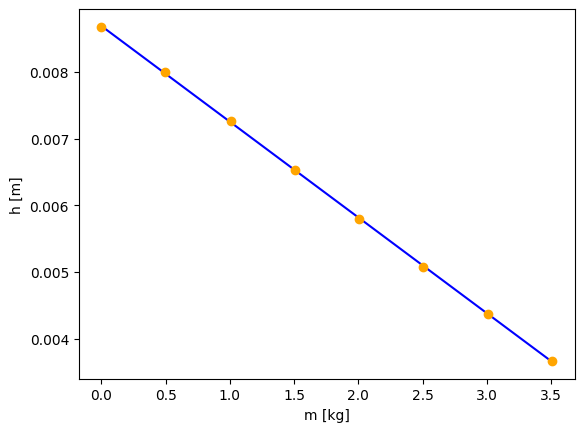

In [22]:
vekt1 = 0.499 # [kg]
vekt2 = 1.007 # [kg]
vekt3 = 2.0025 # [kg]

# m = np.array([0, 500, 1000, 1500, 2000, 2500, 3000, 3500]) # [g]


m = np.array([0, vekt1, vekt2, vekt1 + vekt2, vekt3, vekt1 + vekt3, vekt2 + vekt3, vekt1 + vekt2 + vekt3]) # [kg]
h = np.array([8.67, 8.00, 7.27, 6.53, 5.80, 5.07, 4.37, 3.67])* 1E-3 # [m]


slope, intercept, r_value, p_value, std_err = lr(m, h)

print(print(f'A: {slope: .2}, B: {intercept: .2}, std_err: {std_err: .2}'))

plt.plot(m, slope*m + intercept, color = 'blue', label = 'fit')
plt.plot(m, h, 'o', color = 'orange', label = 'data')
plt.xlabel('m [kg]')
plt.ylabel('h [m]')

In [31]:
l = 1.34 # [m] ± 0.5 [cm] TODO: Legg til usikkerhet fra målestokk. 
d = 0.0163 # [m] ± 50 μm


def E_func(l,A,d):
    # Returns Young's modulus E in [Pa]
    g = 9.81 # [m/s^2]
    π = np.pi
    return (4*l**3*g)/(3*π*abs(A)*d**4)


E = E_func(l,slope,d) # [Pa]
print(f'E: {int(E*1E-9)} [Gpa] ± {E*1E-9*std_err: .2}') # TODO: Er dette riktig måte å få usikkerhet på?

E: 98 [Gpa] ±  0.00069


# Oppgave 2

In [30]:
L = 1.49 # [m] ±  TODO: Legg til usikkerhet fra målestokk.
M = 2.55 # [kg] ± TODO: Legg til usikkerhet fra vekt


def f(M, L, d, E):
    π = np.pi
    return np.sqrt((E*π*d**2)/(16*M*L))


f = f(M, L, d, E) # [Hz]
print(f'f: {int(f)} Hz')

f: 1164 Hz


Vi testet med svevemetoden og kom fram til at den egt frekvensen er 1178.8 Hz